In [118]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq    # FFT and helper functions
import numpy as np


from scipy.signal import hilbert, resample_poly
import librosa

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"

In [ ]:



sr, samp = wavfile.read(input_file)
data_off = resample_poly(samp,1,16)
Fs = int(2e3)
dc_off = np.mean(data_off)
data = data_off - dc_off


#frequencies, times, spectrogram = signal.spectrogram(samp, Fs)
analytic_signal = hilbert(data)
hilb_x = np.abs(analytic_signal)

t1 = np.linspace(0,(len(data_off)/Fs),len(data_off))




plt.figure(figsize=([16, 4]))	 # Define figure for plots
plt.plot(t1[Fs*300:int(Fs*300.1)], data[Fs*300:int(Fs*300.1)], label="Data")
plt.plot(t1[Fs*300:int(Fs*300.1)], hilb_x[Fs*300:int(Fs*300.1)], label="Hilbert")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

# Load the audio file

sr, data = wavfile.read(input_file)

# Convert stereo to mono if needed
if len(data.shape) > 1:
    data = np.mean(data, axis=1)  # Average the two channels

# Compute the FFT
N = len(data)  # Total number of samples
fft_result = fft(data)  # Apply Fourier Transform
frequencies = fftfreq(N, 1/sr)  # Get frequency values

# Get the magnitude spectrum
magnitude = np.abs(fft_result)[:N // 2]  # Take only positive frequencies
freqs = frequencies[:N // 2]  # Positive frequency range

# Count the number of significant Fourier components
threshold = np.max(magnitude) * 0.001  # Set a threshold (1% of max amplitude)
num_components = np.sum(magnitude > threshold)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(freqs[1:], magnitude[1:], label="Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"Frequency Spectrum - {num_components} Fourier Components Found")
plt.legend()
plt.show()

print(f"Number of significant Fourier components: {num_components}")


BroadBand Hilbert transform

Hilbert -> kvadrert -> midling filter -> nedsampling -> spectrogram

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq    # FFT and helper functions
import numpy as np



from scipy.signal import hilbert, resample_poly
import librosa

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"

#Getting data from wav file
data_org, sr = librosa.load(input_file)

#downsampling audio data
Fs = 2000 #[Hz]
data_offcet = resample_poly(data_org,1,int(sr/Fs))


#Removing Dc-offcet from data
dc_offcet = np.mean(data_offcet)
data = data_offcet - dc_offcet

t = np.linspace(0,(len(data_offcet)/Fs),len(data_offcet))

#Hilbert transform ov data
analytic_signal = np.absolute(hilbert(data))
#Squaring each element
h_2 = np.square(analytic_signal)

#Moving avg filter
med_filt_size = 11
h_filt = signal.medfilt(h_2,med_filt_size)

#Downsampling
DS_h = resample_poly(h_filt,1,med_filt_size)
DS_Fs = Fs/med_filt_size
DS_t = np.linspace(0,(len(DS_h)/DS_Fs),len(DS_h))

#Normalizing Hilbert
Norm_h = h_2/h_filt



#plotting results
plt.figure(figsize=(12,8))

plt.subplot(4,2,1)
plt.plot(t,data_offcet)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,2)
plt.plot(t,data)
plt.title("Removing DC-offcet")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,3)
plt.plot(t,analytic_signal)
plt.title("Hilbert transform of signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,4)
plt.plot(t,h_2)
plt.title("Squared Hilbert transform")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,5)
plt.plot(t,h_filt)
plt.title("Med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,6)
plt.plot(DS_t,DS_h)
plt.title("Downsampled med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,7)
plt.plot(t[1:],Norm_h[1:])
plt.title("Hilbert Squared Norm")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,8)
plt.plot(DS_t,DS_h)
plt.title("Downsampled med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")


plt.tight_layout()
plt.show()

In [122]:
#Hilbert spectrogram
def plot_spectrogram(x, t, fs, n_segment, f_max, s_min):
    """Plot spectrogram of signal x.

    Parameters
    ----------
    x: array of floats
        Signal in time-domain
    t: Numpy array of floats
        Time vector for x
    fs: float
        Sample rate [Samples/s]
    n_segmend: int
        No. of samples in segment for spectrogram calculation
    f_max: float
        Max. on frequency axis
    """
    # Configure spectrogram
    #s_min = -50       # Minimum on the intensity plot. Lower values are 'black'
		
    # Calculate spectrogram
    f, t, sx = signal.spectrogram(x, fs, nperseg=n_segment, detrend=False)
    sx_db = 10*np.log10(sx/sx.max())   # Convert to dB
    		
    # Plot spectrogram
    plt.figure(figsize=(16, 6))  # Define figure for results	
    plt.subplot(1, 1, 1)
    
    plt.pcolormesh(t, f, sx_db, vmin=s_min, cmap='inferno')  # Draw spectrogram image
    print(f.max())		
    plt.xlabel("Time [s]")         # Axis labels and scales
    plt.ylabel("Frequency [Hz]")
    plt.ylim(0, f_max)
    		
    plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
    plt.show()
    return 0
nperseg = 1000





In [ ]:
Hilber_spec3 = plot_spectrogram(analytic_signal,t,Fs,nperseg, 1000,-50)
Hilber_spec4 = plot_spectrogram(analytic_signal,t,Fs,nperseg, 1000,-65)


org_pec = plot_spectrogram(data,t,Fs,nperseg,1000,-65)
DS_spec = plot_spectrogram(DS_h,DS_t,DS_Fs,600,100,-50)

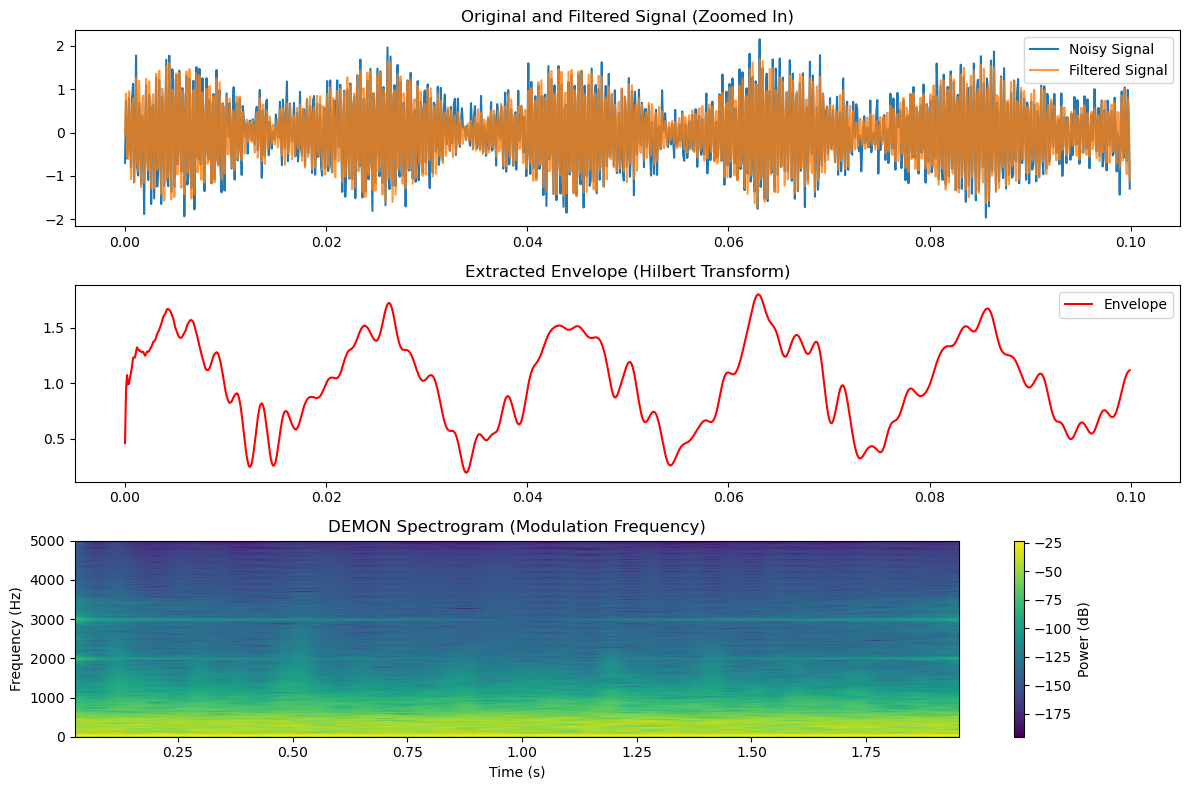

In [2]:
#Chad DEMON
import numpy as np
import scipy.signal as signal
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Simulated signal parameters
fs = 10000  # Sampling rate (Hz)
t = np.arange(0, 2, 1/fs)  # Time vector (2 seconds)
carrier_freq = 3000  # Carrier frequency (Hz)
modulation_freq = 50  # Modulation frequency (Hz)
modulation_index = 0.5  # Modulation depth

# Generate a modulated signal: (1 + modulation) * carrier
modulation = 1 + modulation_index * np.sin(2 * np.pi * modulation_freq * t)
signal_original = modulation * np.sin(2 * np.pi * carrier_freq * t)

# Add some noise to simulate real-world conditions
noise = np.random.normal(0, 0.3, signal_original.shape)
noisy_signal = signal_original + noise

# Apply a bandpass filter around the carrier frequency


def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # Corrected here!
    return filtfilt(b, a, signal)


filtered_signal = bandpass_filter(noisy_signal, lowcut=2500, highcut=3500, fs=fs)

# Compute Hilbert Transform to get the analytic signal
analytic_signal = signal.hilbert(filtered_signal)
envelope = np.abs(analytic_signal)

# Compute spectrogram of the envelope to extract modulation frequency
frequencies, times, Sxx = signal.spectrogram(envelope, fs=fs, nperseg=512)

# Plot the results
plt.figure(figsize=(12, 8))

# Original Noisy Signal
plt.subplot(3, 1, 1)
plt.plot(t[:1000], noisy_signal[:1000], label="Noisy Signal")
plt.plot(t[:1000], filtered_signal[:1000], label="Filtered Signal", alpha=0.8)
plt.legend()
plt.title("Original and Filtered Signal (Zoomed In)")

# Envelope Extraction
plt.subplot(3, 1, 2)
plt.plot(t[:1000], envelope[:1000], color='r', label="Envelope")
plt.legend()
plt.title("Extracted Envelope (Hilbert Transform)")

# Spectrogram of the Envelope
plt.subplot(3, 1, 3)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.title("DEMON Spectrogram (Modulation Frequency)")
plt.colorbar(label="Power (dB)")

plt.tight_layout()
plt.show()


noice = -54.79142665863037


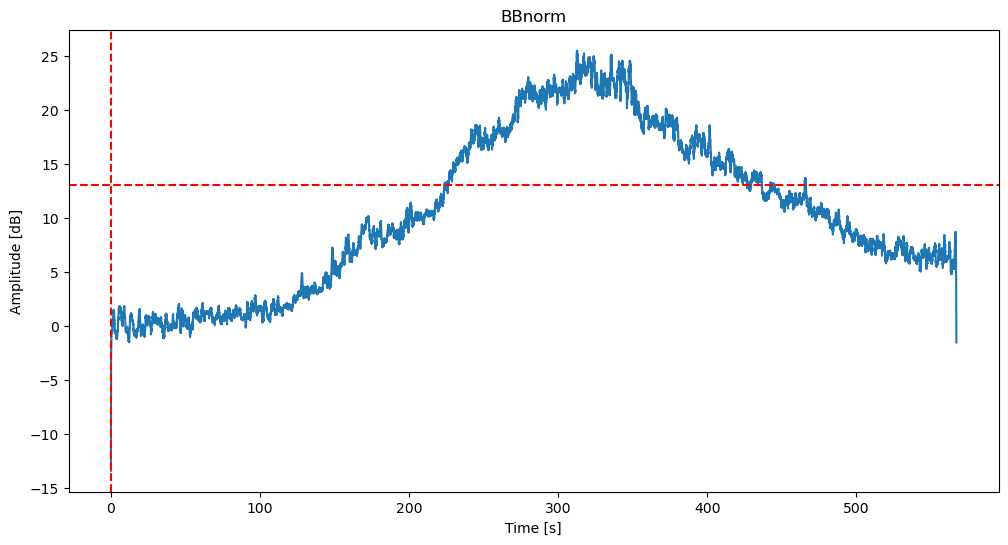

[223.63  223.635 223.64  ... 466.065 466.07  466.075]


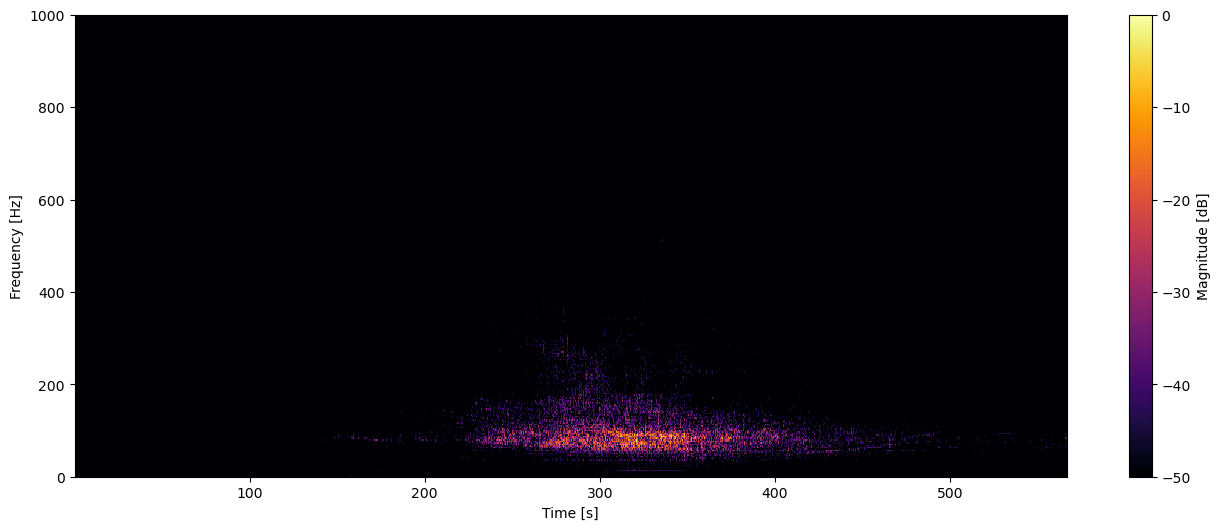

In [3]:
import functions
from scipy import signal
#Broad band and Demon testing
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"

DS_Sx, DS_Fs, DS_t = functions.Hilbert_DS(input_file,Fs=3000,medfilt_window=15)
Trigger_time = functions.Hilbert_BB(DS_Sx,DS_Fs,window_size=1,noice_t_start=0,trigger=13,plot=True)
print(Trigger_time)













spec = functions.plot_spectrogram_from_file(input_file,Fs=3000,n_segment=900,f_max=1e3,s_min=-50)





Spacer


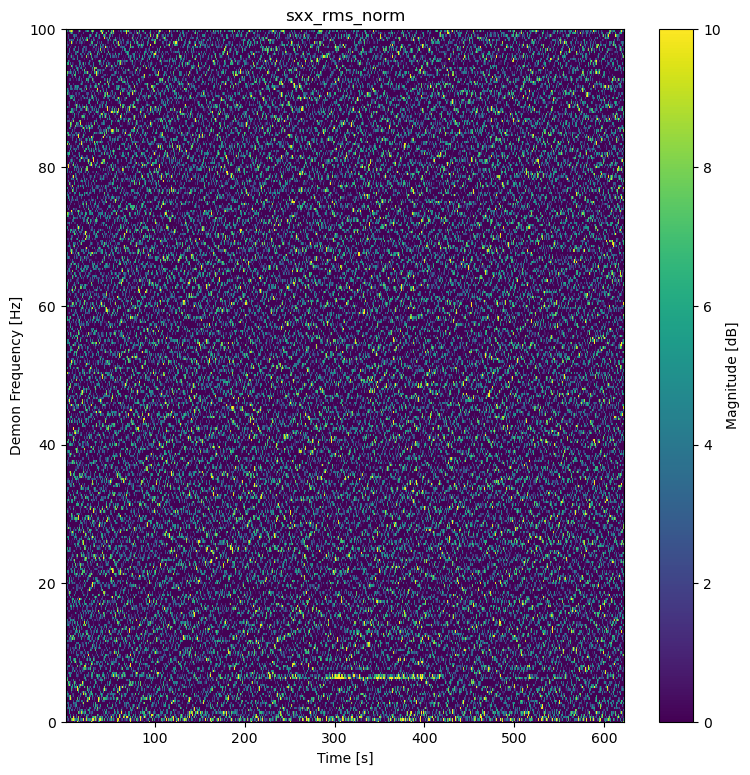

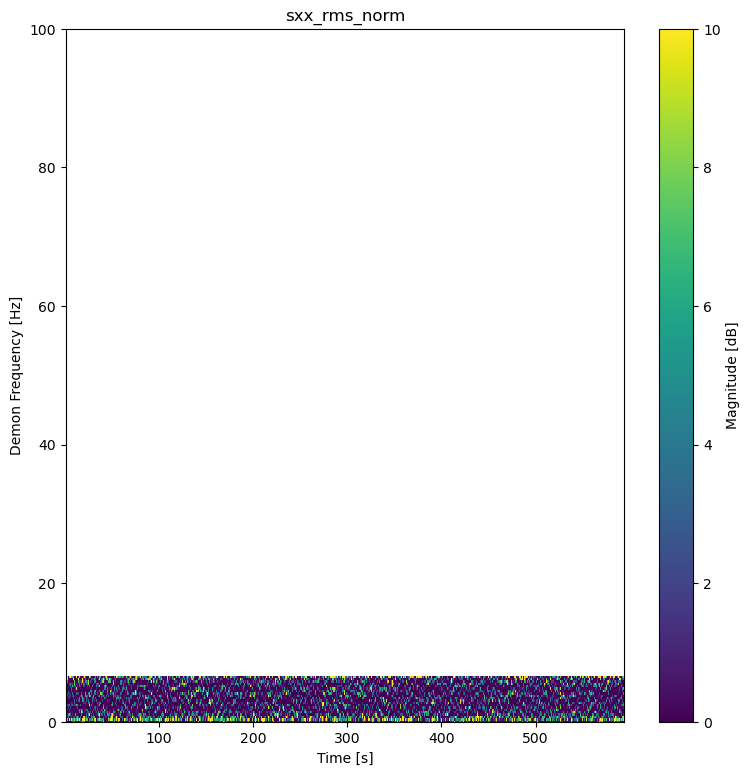

In [1]:
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
import functions
dem = functions.DEMON_from_file(input_file=input_file,Fs=4000,Fds=200,freq_filt=7,fmax=100,s_max=10)
print("Spacer")
DS_Sx, DS_Fs, DS_t = functions.Hilbert_DS(input_file=input_file, Fs=4000,medfilt_window=301 )
dem2 = functions.DEMON_from_data(DS_Sx=DS_Sx,DS_Fs=DS_Fs,Fds=200,freq_filt=7,fmax=100,s_max=10)

fs = 3000
sig_timer: 1.4431976249907166


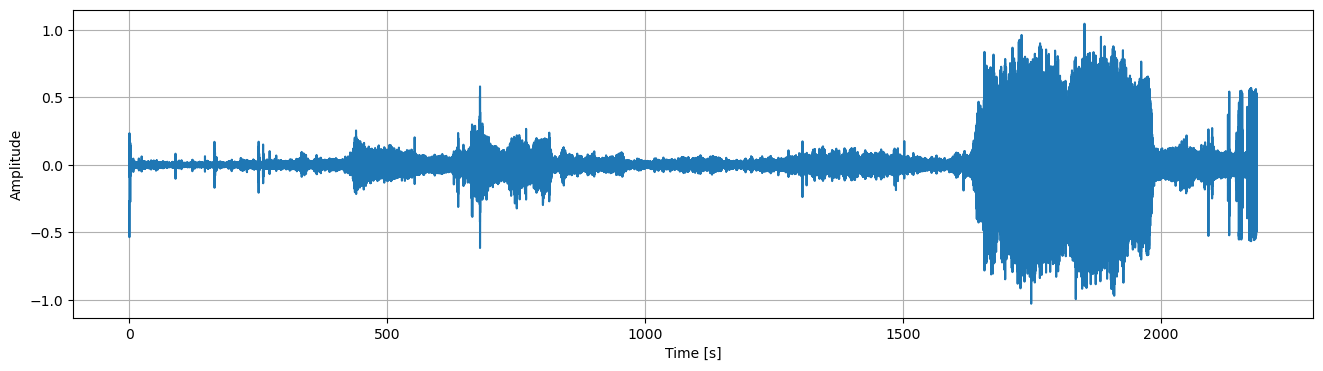

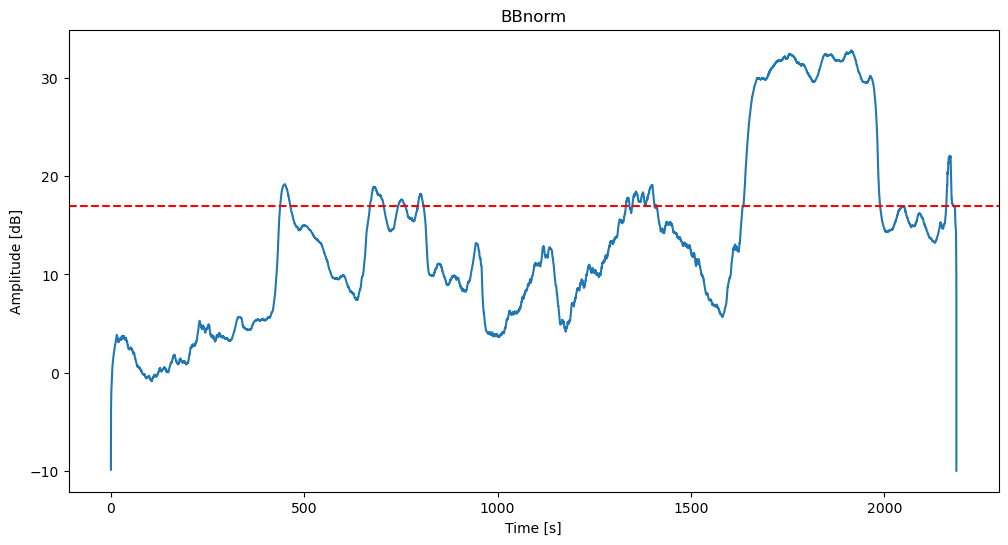

BB_timer: 22.698493667063303
Trigger time = [ 437.39   669.935  742.85   742.88   793.835 1331.725 1348.17  1408.53
 1633.43  1635.89  2160.12 ]


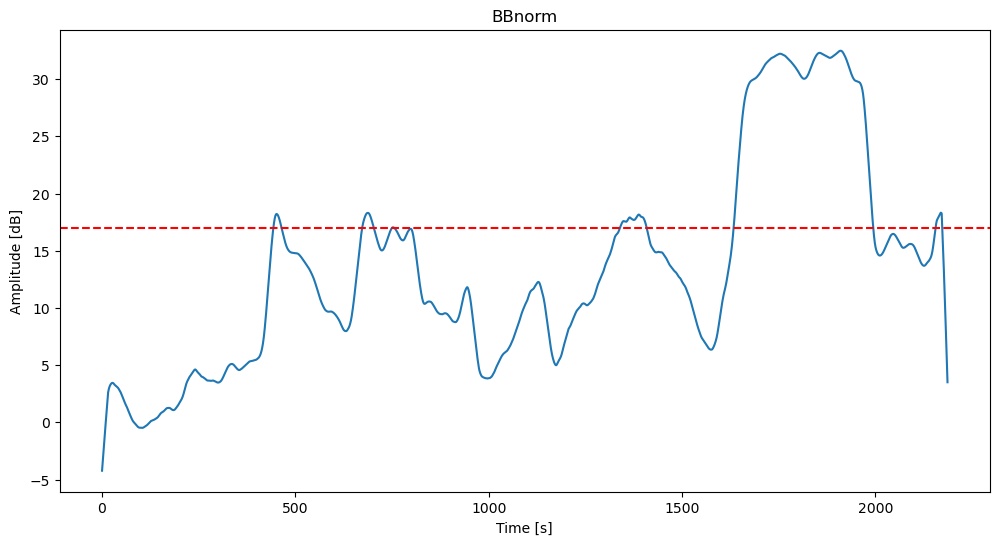

BB2_timer: 26.061518999980763
Trigger time2 = [ 442.975  672.7    749.885 1339.2   1633.215 2155.465]


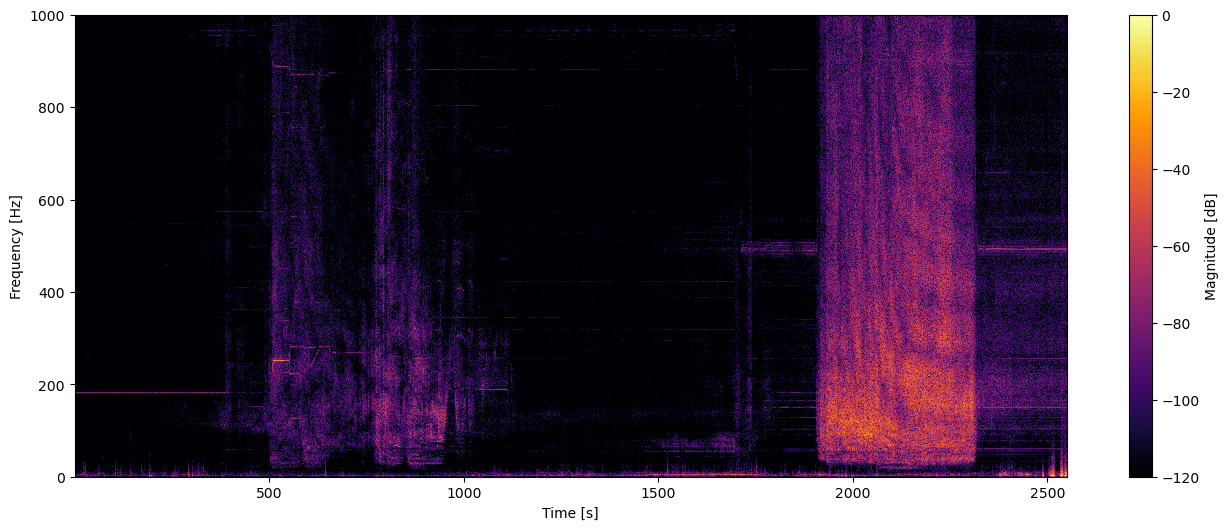

spce_timer: 4.064148750039749
Demon_timer: 17.48012695799116


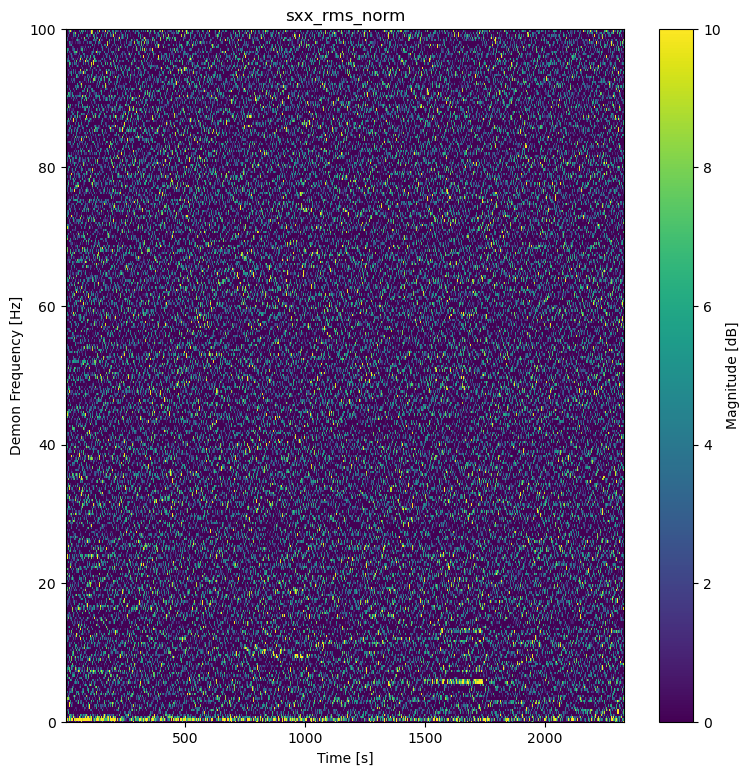

In [1]:
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/3.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Processing_scripts/3.jpeg"
import functions
import librosa
import numpy as np
from time import perf_counter
from scipy.signal import resample_poly
import scipy.signal as signal

sxx, sr = librosa.load(input_file, mono= True)
#sxx = sxx[540*sr:660*sr]
fs = 3000

sx = resample_poly(sxx,1,int(sr/fs))
#b,a = signal.butter(N=4,Wn=100, btype="highpass",fs=fs)
#sx = signal.filtfilt(b,a,sx)
sx = sx-np.mean(sx)
print(f"fs = {fs}")
t = np.linspace(0,(len(sx)/fs),len(sx))

sig_t_start = perf_counter()
sig = functions.plot_signal(sx,t,output_path)
sig_t_stop = perf_counter()
print(f"sig_timer: {sig_t_stop - sig_t_start}")

BB_t_start = perf_counter()
Trigger_time = functions.BroadBand_from_data(sx,fs,hilbert_win=15,window_size=30,trigger=17,plot=True)
BB_t_stop = perf_counter()
print(f"BB_timer: {BB_t_stop - BB_t_start}")
print(f"Trigger time = {Trigger_time}")

BB2_t_start = perf_counter()
Trigger_time2 = functions.BroadBand_from_file(input_file, Fs=3000, hilbert_win=15,window_size=30,trigger=17,plot=True)
BB2_t_stop = perf_counter()
print(f"BB2_timer: {BB2_t_stop - BB2_t_start}")
print(f"Trigger time2 = {Trigger_time2}")


spec_t_start = perf_counter()
#TODO fs på signalet, vinduslengde i sek (segmentlengde) feks 1+s
spec = functions.plot_spectrogram_from_file(input_file, 6000, 12000, 1000, -120)
spec_t_stop = perf_counter()
print(f"spce_timer: {spec_t_stop - spec_t_start}")

Demon_t_start = perf_counter()
demon = functions.DEMON_from_file(input_file, 3000, 200, 7, 100, 10)
Demon_t_stop = perf_counter()
print(f"Demon_timer: {Demon_t_stop - Demon_t_start}")

sig_timer: 1.183960416004993
spec_timer: 0.24195329193025827


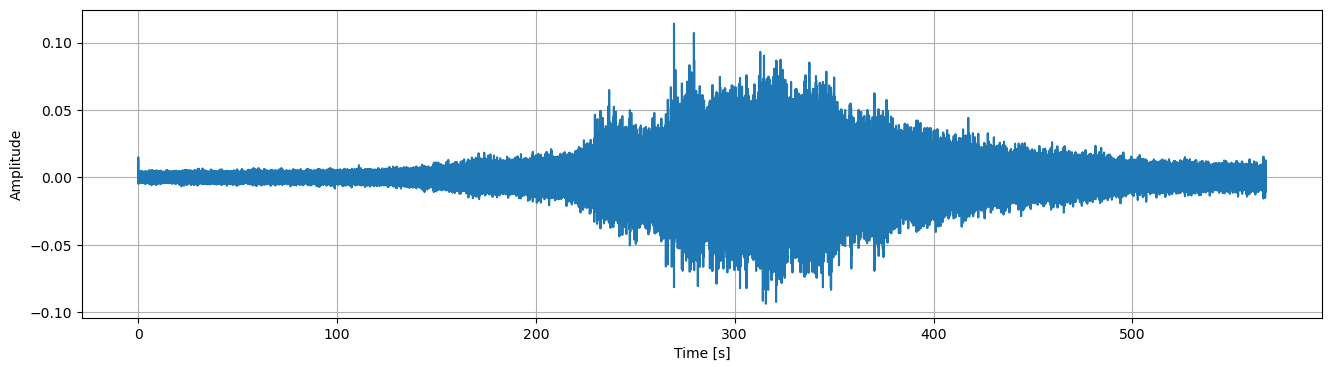

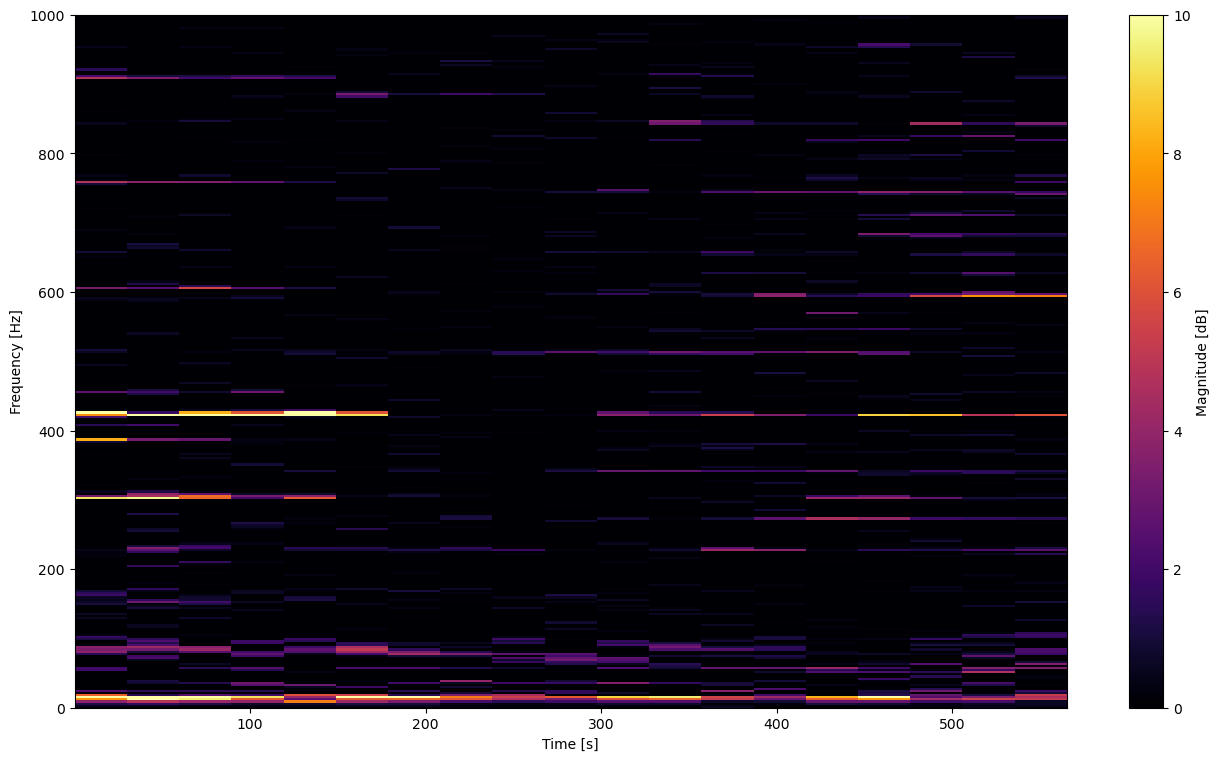

In [7]:
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Processing_scripts/2.jpeg"
import functions
import librosa
import numpy as np
from time import perf_counter
from scipy.signal import resample_poly
import scipy.signal as signal

fs = 3000

sx, fs = functions.load_audiofile(input_file=input_file,fs=fs,fc_low=10,remove_offcet=True)
t = np.linspace(0,(len(sx)/fs),len(sx))

sig_t_start = perf_counter()
sig = functions.plot_signal(sx,t,output_path)
sig_t_stop = perf_counter()
print(f"sig_timer: {sig_t_stop - sig_t_start}")


spec_t_start = perf_counter()
tsp, fsp, spec = functions.plot_spectrogram(sx,fs,tperseg=1/3,freq_filt=13,hfilt_length=30,f_max=1000,s_min=0,s_max=10,plot=True)
spec_t_stop = perf_counter()
print(f"spec_timer: {spec_t_stop - spec_t_start}")

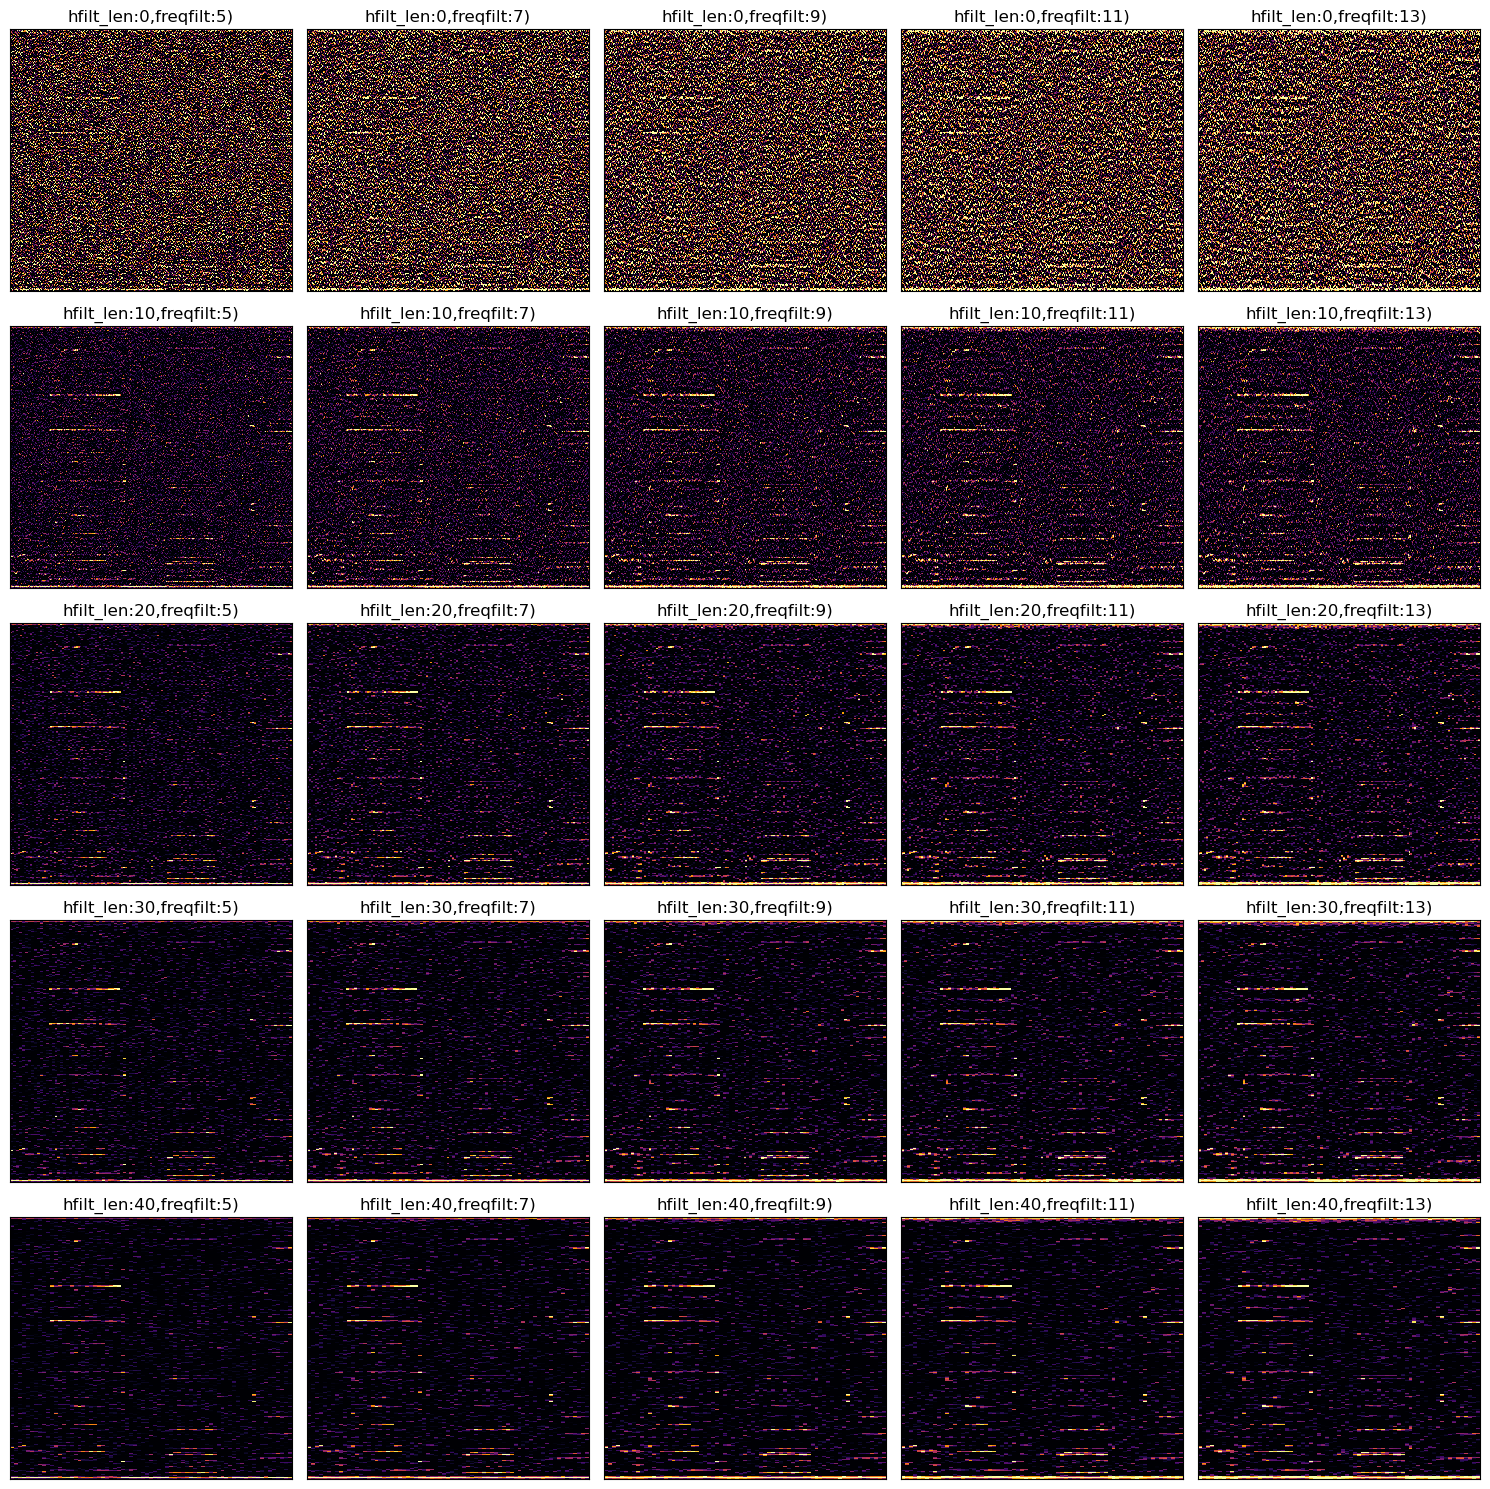

In [2]:

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/2.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Processing_scripts/2.jpeg"
import functions
import librosa
import numpy as np
from time import perf_counter
from scipy.signal import resample_poly
import scipy.signal as signal
import matplotlib.pyplot as plt

sxx, sr = librosa.load(input_file)
#sxx = sxx[1500*sr:2500*sr]
fs = 3000

sx = resample_poly(sxx,1,int(sr/fs))
b,a = signal.butter(N=4,Wn=100, btype="highpass",fs=fs)
sx = signal.filtfilt(b,a,sx)
sx = sx-np.mean(sx)

def generate_subplot_grid(n, m):
    fig, axes = plt.subplots(n, m, figsize=(m * 3, n * 3))  # Adjust figure size
    for i in range(n):  # Loop over rows
        for j in range(m):  # Loop over columns
            ax = axes[i, j]  # Select the subplot
            j += 2
            t, f, sx_db = functions.DEMON_from_data(sx,fs,Fds=200,freq_filt=2*j+1,hfilt_length=i*10,fmax=100,s_max=5,window="hamming",plot=False)
            ax.pcolormesh(t, f, sx_db, vmin=0, vmax=5, cmap='inferno')  # Draw spectrogram image
            ax.set_title(f"hfilt_len:{i*10},freqfilt:{2*j+1})")
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example: Generate a 3x4 grid of subplots
generate_subplot_grid(5, 5)



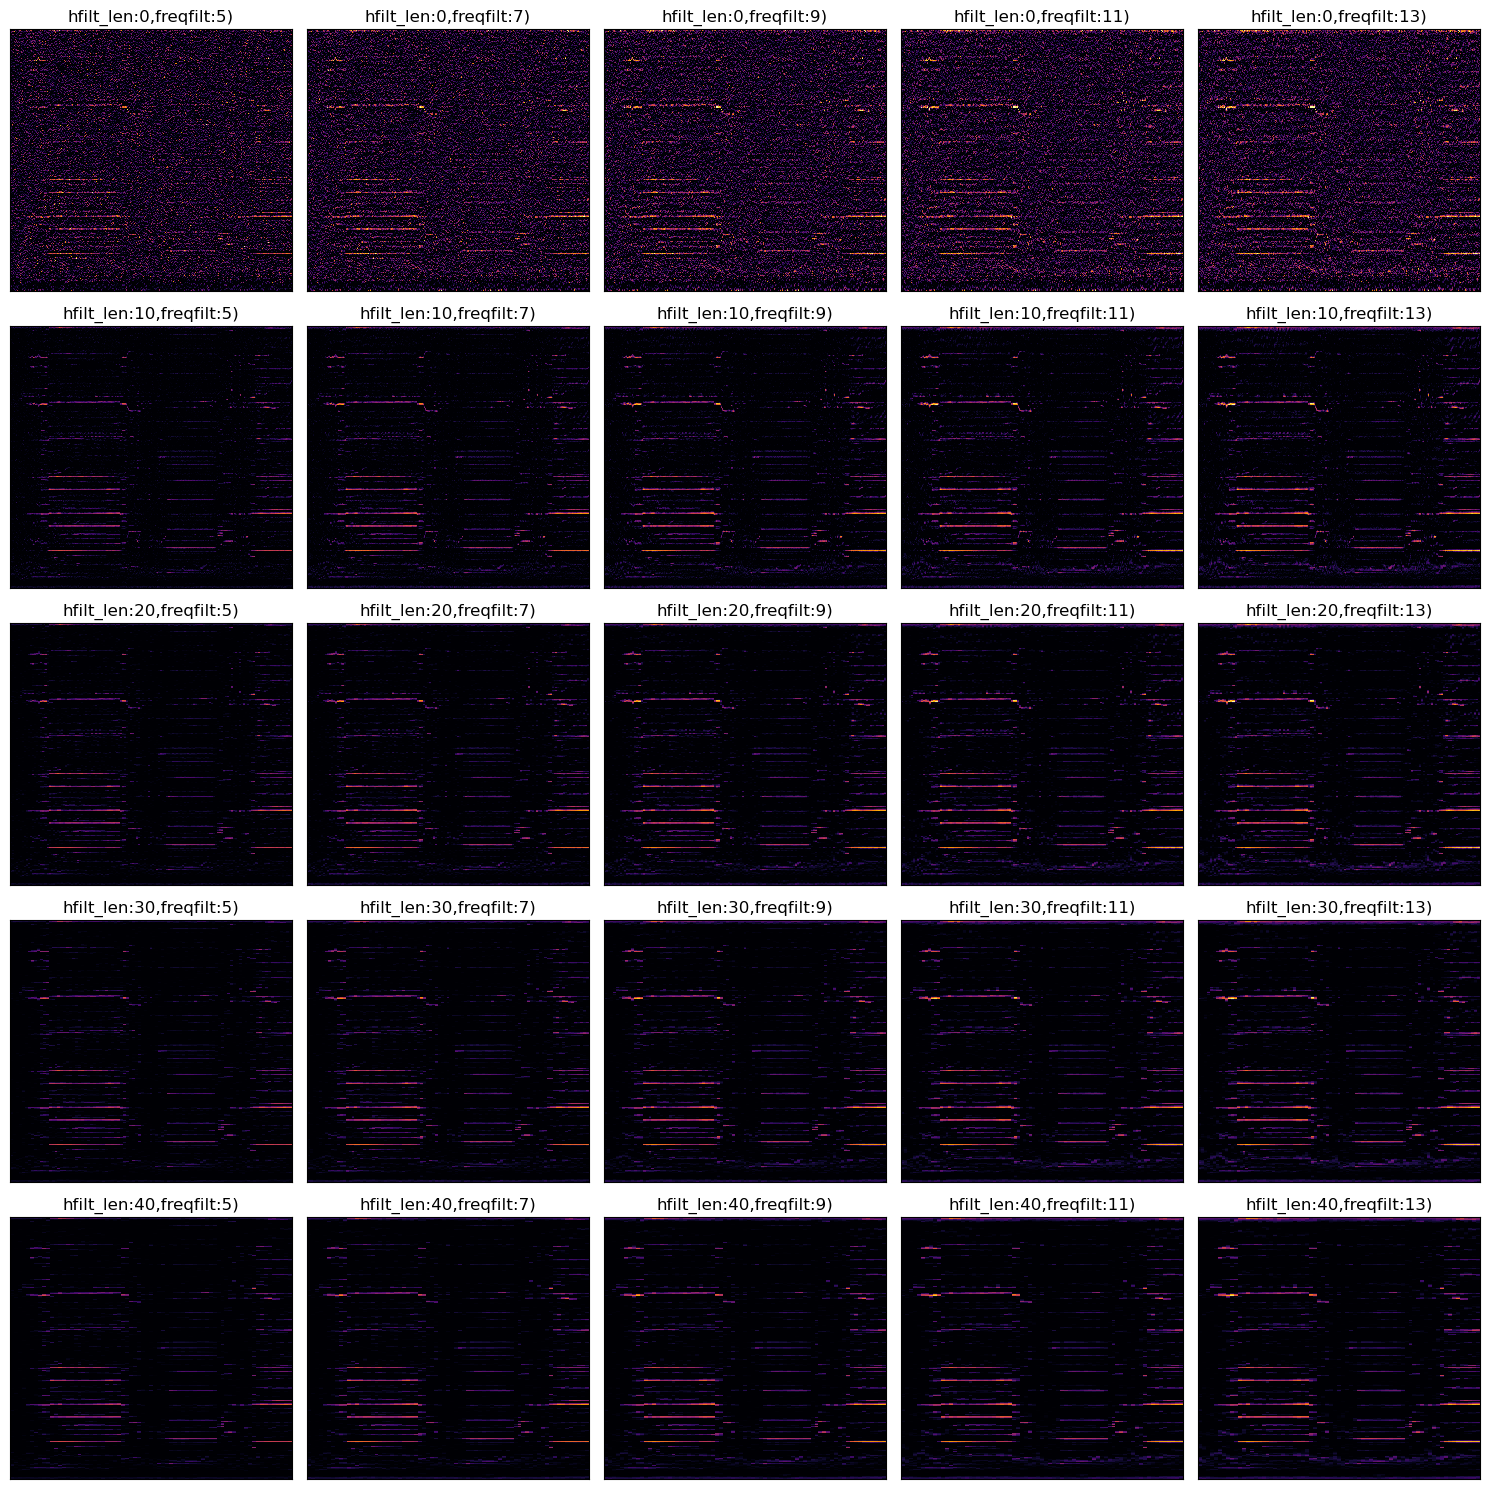

In [3]:
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/2.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Processing_scripts/2.jpeg"
import functions
import librosa
import numpy as np
from time import perf_counter
from scipy.signal import resample_poly
import scipy.signal as signal
import matplotlib.pyplot as plt

sxx, sr = librosa.load(input_file)
#sxx = sxx[1500*sr:2500*sr]
fs = 3000

sx = resample_poly(sxx,1,int(sr/fs))
b,a = signal.butter(N=4,Wn=100, btype="highpass",fs=fs)
sx = signal.filtfilt(b,a,sx)
sx = sx-np.mean(sx)

def generate_subplot_grid(n, m):
    fig, axes = plt.subplots(n, m, figsize=(m * 3, n * 3))  # Adjust figure size
    for i in range(n):  # Loop over rows
        for j in range(m):  # Loop over columns
            ax = axes[i, j]  # Select the subplot
            j += 2
            t, f, sx_db = functions.plot_spectrogram(sx,fs,nperseg=600,freq_filt=2*j+1,hfilt_length=i*10,f_max=1000,s_min=0,s_max=None,plot=False)
            ax.pcolormesh(t, f, sx_db, vmin=0, vmax=20, cmap='inferno')  # Draw spectrogram image
            ax.set_title(f"hfilt_len:{i*10},freqfilt:{2*j+1})")
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example: Generate a 3x4 grid of subplots
generate_subplot_grid(5, 5)

/var/folders/zg/23sg06wj2kzb1l0qdkk5tr140000gn/T/ipykernel_53330/1972358212.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  data_offcet, fs = librosa.load(input_file,sr=48000)  # Load the file, returns the audio signal and its sampling rates
/opt/anaconda3/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


spec time = 0.07156016700901091


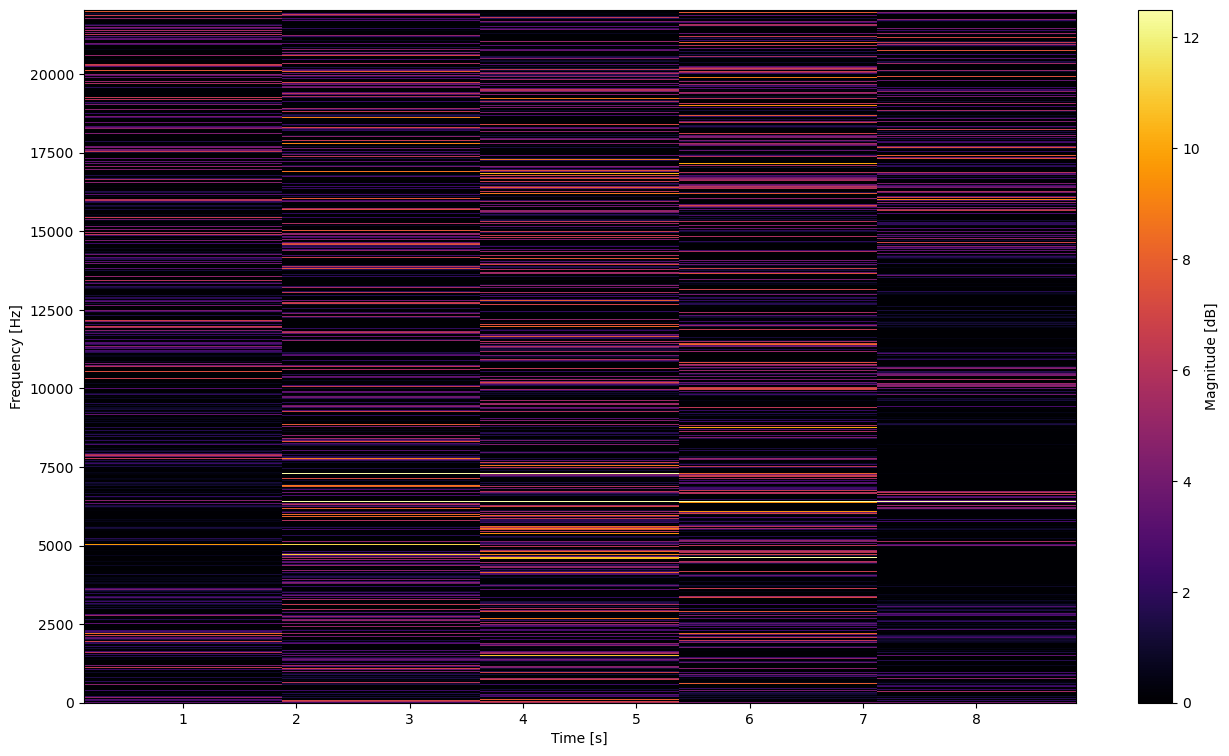

In [2]:
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/2.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Processing_scripts/2.jpeg"
import functions
import librosa
import numpy as np
from time import perf_counter
from scipy.signal import resample_poly
import scipy.signal as signal
import matplotlib.pyplot as plt

#Broad band and Demon testing
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/5000hz.m4a"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Signal_plot.jpeg"
# Load audio data from the input file
data_offcet, fs = librosa.load(input_file,sr=48000)  # Load the file, returns the audio signal and its sampling rates

b,a = signal.butter(N=4,Wn=5, btype="highpass",fs=fs)
data_offcet = signal.filtfilt(b,a,data_offcet)   

# Remove DC offset by subtracting the mean value
x = data_offcet - np.mean(data_offcet)  # Remove the mean (DC offset)



spec_t0 = perf_counter()
t, f, spec  = functions.plot_spectrogram(x,fs,tperseg=2,freq_filt=11,hfilt_length=3,f_max=22050,s_min=0,s_max=12.5)
spec_t1 = perf_counter()
print(f"spec time = {spec_t1-spec_t0}")



audio time = 4.838741875020787


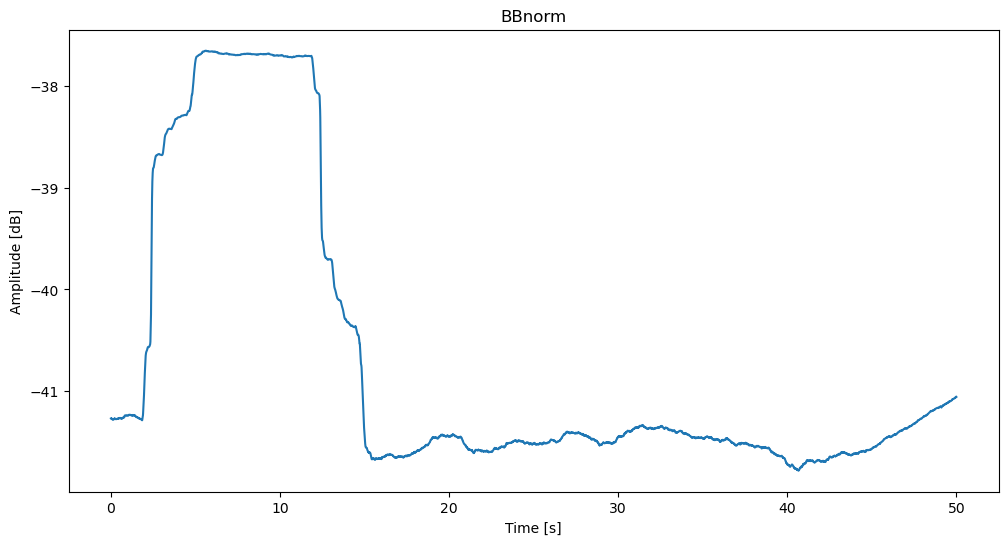

In [1]:
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/2.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Processing_scripts/2.jpeg"
import functions
import librosa
import numpy as np
from time import perf_counter
from scipy.signal import resample_poly
import scipy.signal as signal
import matplotlib.pyplot as plt

#Broad band and Demon testing
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/2.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Signal_plot.jpeg"
audio_t0 = perf_counter()
x,fs = functions.load_audiofile(input_file,fs=3000,fc_low=5)
x = x[800*fs:850*fs]
audio_t1 = perf_counter()
print(f"audio time = {audio_t1-audio_t0}")

y,t = functions.BB_data(x,fs,hilbert_win=15,window_size=10)

trigger = functions.BB_trigger(y,fs,5,30)

plt.figure(figsize=(12, 6))  # Set up the figure for plotting
plt.plot(t, y)  # Plot the normalized signal
plt.title("BBnorm")  # Title of the plot
plt.xlabel("Time [s]")  # X-axis label
plt.ylabel("Amplitude [dB]")  # Y-axis label
plt.show()  # Show the plot



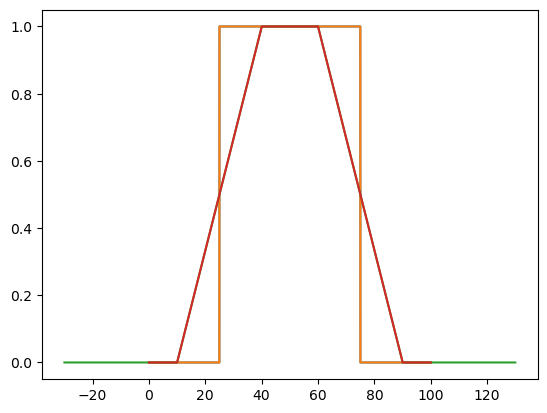

In [7]:
#Testing av moving average filter

import numpy as np
import matplotlib.pyplot as plt
import functions

fs  = 100
a = np.zeros(10000)
a[2500:7500] = 1

a2 = np.ones(5000)
a2 = np.pad(a2,pad_width=int(2500),mode="constant",constant_values=0)

ta = np.linspace(0,len(a)/fs,len(a) )

plt.plot(ta,a)
plt.plot(ta,a2)

b = functions.moving_average_zero_padded(a,window_size=fs*30|1)
tb = np.linspace(0,len(b)/fs,len(b) )
plt.plot(tb-30,b)

c = b[30*fs:-30*fs]
plt.plot(ta,c)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

<Figure size 1600x800 with 0 Axes>

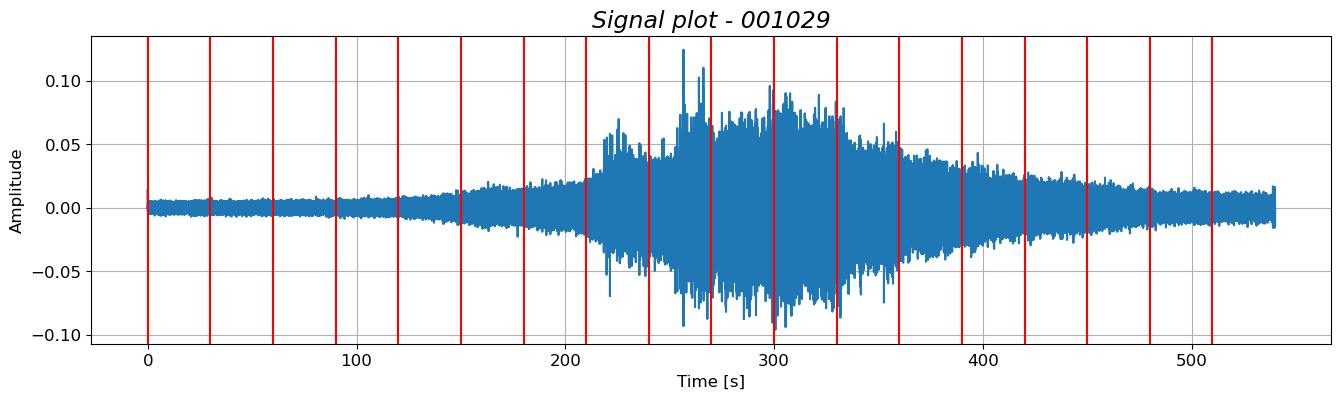

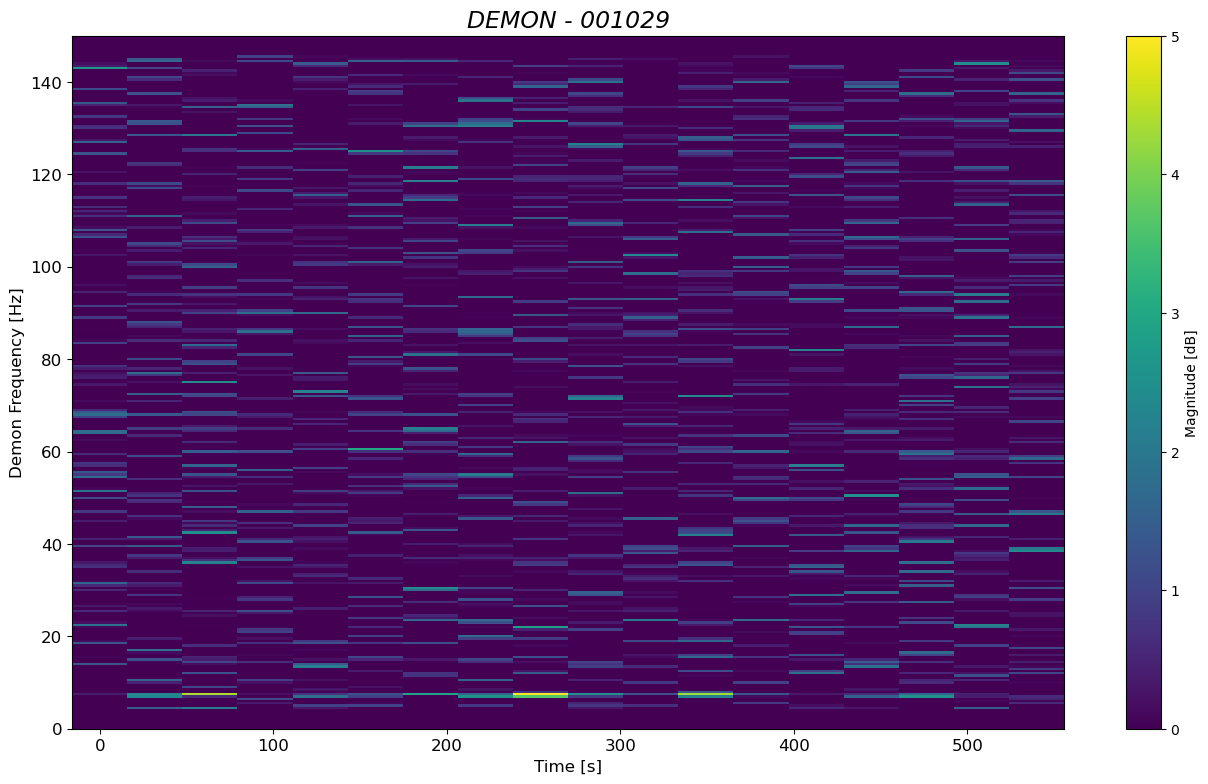

In [5]:
#DEMON live test

#Opptak 001029
input_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
save_path_sig = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Signal_001029.png"
save_path_spec = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Spec_001029.png"
save_path_demon = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Demon_001029.png"
save_path_BB = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/BroadBand_001029.png"
save_path_BB_segmented = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/BroadBand_001029_segmented.png"

import functions
import matplotlib.pyplot as plt
import numpy as np

fs = 10000
#DEMON parm
fds = 300
tperseg = 2
freq_filt=11
hfilt_length=30
_len = hfilt_length

#Laster inn lyddata
sx, fs = functions.load_audiofile(input_path, fs, 5, True)
t = np.linspace(0,len(sx)/fs,len(sx))
figure = plt.figure(figsize=(16,8))
figure.suptitle("Testing med USV 21.03.25", fontsize=16)

#plotter lydsignal med linjer for segmentering
fig1 = plt.figure(figsize=(16,4)) #Signal plot
plt.plot(t, sx)
for k in range(0,int(len(sx)/fs),_len):
    plt.axvline(x=k,color="red")

plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Signal plot - 001029",fontsize=17, style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
fig1.savefig(fname=save_path_sig, format="png", dpi=300)

#DEMON
fig3 = plt.figure(figsize=(16,9))

#Segmenterer data for DEMON
f_bin = int(fds*tperseg//2) + 1
demon_db = np.empty((f_bin,0))
for k in range(0,int(len(sx)/fs),_len):
    sx_dem = sx[k*fs:((_len+k)*fs)]
    dem_t, dem_f, dem = functions.DEMON_from_data(sx_dem,fs,fds,tperseg,freq_filt,hfilt_length,plot=False)
    demon_db = np.append(demon_db,dem,axis=1)


df = dem_f[1]-dem_f[0]
demon_f = np.arange(0,int(fds//2),df)
demon_t = np.linspace(0,len(sx)/fs,len(demon_db[0]))


plt.pcolormesh(demon_t, dem_f, demon_db, vmin=0,vmax=5)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Demon Frequency [Hz]",fontsize=12)
plt.ylim(0,fds/2)
plt.title("DEMON - 001029",fontsize=17, style='italic')
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


IndexError: list assignment index out of range

<Figure size 1600x800 with 0 Axes>

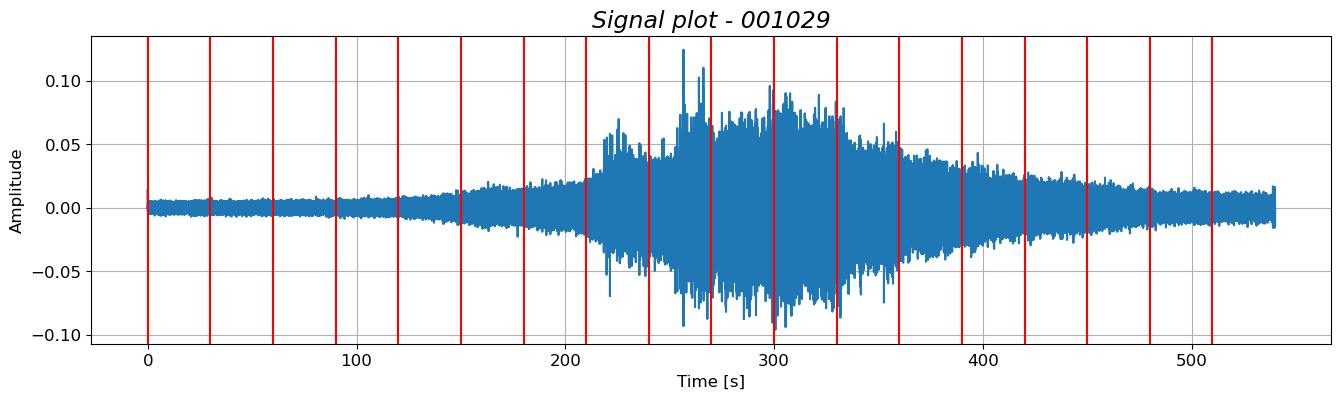

<Figure size 1600x900 with 0 Axes>

In [6]:
#Debug DEMON Live

def DEMON_from_data(sx, fs, Fds,tperseg,freq_filt,hfilt_length ,fmax=100, s_max=10, window="hamming", plot=True):
    #DEMON 2
    """
    PARAMETERS:
        sx: array_like
            Time series of measurement values

        fs: int
            Sample frequency
        
        Fds: int
            Demon sample frequency

        tperseg: float
            Seconds of audiodata for spectrogram fft
        
        freq_filt: int (odd)
            Number of frequency bins for smoothing and normalizing
        
        hfilt_length: int
            Number of seconds used for horizontal smoothing
        
        fmax: float
            Max frequency for DEMON spectrogram
        
        s_max: float
            Max dB on spectrogram
        
        window: str
            Spectrogram window
    
    RETURN:
        td: 1D array of float
            time array for spectrogram
        fd: 1D array of float
            frequency array for spectrogram
        sxx_db: 2D array of float
            2D array of intencity for spectrogram (dB)
    """


    
        
    return td_rms, fd_rms, sxx_db


#Opptak 001029
input_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"


import functions
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, resample_poly
import scipy.signal as signal

fs = 10000
#DEMON parm
Fds = 300
tperseg = 2
freq_filt=11
hfilt_length=30
_len = hfilt_length
window = "hamming"

#Laster inn lyddata
sx, fs = functions.load_audiofile(input_path, fs, 5, True)
t = np.linspace(0,len(sx)/fs,len(sx))
figure = plt.figure(figsize=(16,8))
figure.suptitle("Testing med USV 21.03.25", fontsize=16)

#plotter lydsignal med linjer for segmentering
fig1 = plt.figure(figsize=(16,4)) #Signal plot
plt.plot(t, sx)
for k in range(0,int(len(sx)/fs),_len):
    plt.axvline(x=k,color="red")

plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Signal plot - 001029",fontsize=17, style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)


#DEMON
fig3 = plt.figure(figsize=(16,9))

#Segmenterer data for DEMON
f_bin = int(Fds*tperseg//2) + 1
demon_db = np.empty((f_bin,0))
for k in range(0,int(len(sx)/fs),_len):
    sx_dem = sx[k*fs:((_len+k)*fs)]
    #dem_t, dem_f, dem = functions.DEMON_from_data(sx_dem,fs,Fds,tperseg,freq_filt,hfilt_length,plot=False)

    #RMS data of hilbert
    kernal_size = fs/Fds 
    analytic_signal = np.abs(hilbert(sx_dem))**2

    #rms_values = functions.average_filter(analytic_signal, kernal_size)
    #------------------------------------------------------------------------------------------------------------------------
    #def average_filter(signal, window_size):
    """
    Applies an average filter to downsample the signal.
    
    Parameters:
    - signal (1D array): The input signal
    - window_size (int): Number of samples to average per output sample
    
    Returns:
    - downsampled_signal (1D array): The smoothed, downsampled signal
    """
    num_segments = len(analytic_signal) / kernal_size  # Determine new length
    idx = int(num_segments*kernal_size)
    trimmed_signal = analytic_signal[:idx]
    #rms_values = np.mean(analytic_signal[:num_segments*kernal_size].reshape(-1, kernal_size), axis=1)
    rms_values=[]
    for i in range(0,int(num_segments)-1):
        rms_values[i] = np.mean(analytic_signal[int(i*kernal_size):int((1+i)*kernal_size)])
    #------------------------------------------------------------------------------------------------------------------------   
    

    #hente freq
    nperseg= int(Fds*tperseg) #Number of samples in time axis to use for each vertical spectrogram coloumn

    fd_rms, td_rms, sxx_rms = signal.spectrogram(rms_values,Fds,
                                                    nperseg=nperseg,
                                                    noverlap=5*nperseg//6,
                                                    #nfft=int(200*kernal_size / nperseg),
                                                    window=window
                                                    )


    #Normaliserer sxx
    sxx_rms_norm = functions.medfilt_vertcal_norm(spec=sxx_rms,vertical_medfilt_size=freq_filt)

    #------------------------------------------------------------------------------------------------------------------------
    #sxx_db, fd_rms, td_rms = functions.spec_hfilt2(10*np.log10(sxx_rms_norm),fd_rms,td_rms,window_length=hfilt_length)
    #Spec_hfilt2

    #def spec_hfilt2(spec, freq, time, window_length: float):
    spec=10*np.log10(sxx_rms_norm)
    freq = fd_rms
    time = td_rms
    window_length=hfilt_length
    # Convert window length from seconds to number of time bins
    dt = time[1] - time[0]  # Time step between spectrogram columns
    segment_size = max(1, int(window_length / dt))  # Ensure at least 1. Segment_size er antall t_bins window_length dekker

    # Compute number of segments
    num_segments = spec.shape[1] // segment_size #Antall kolonner i spektrogrammet delt på segment_size
    
    # Trim excess columns & reshape into segments
    smoothed_spec = spec[:, :num_segments * segment_size]
    smoothed_spec = smoothed_spec.reshape(spec.shape[0], num_segments, segment_size)
    smoothed_spec = smoothed_spec.mean(axis=2)  # Average along time segments


    # Compute new time bins as the average of each segment
    new_time = time[:num_segments * segment_size].reshape(num_segments, segment_size).mean(axis=1)

    sxx_db = smoothed_spec
    fd_rms = freq
    td_rms = new_time
    #------------------------------------------------------------------------------------------------------------------------



    #bandpass cut filter
    fc = 4 #Hz
    sxx_db[0:int(fc*tperseg+1),:] = 0
    sxx_db[-int(fc*tperseg+1):,:] = 0

    #EOF
    dem_t = td_rms
    dem_f = fd_rms
    dem = sxx_db

    demon_db = np.append(demon_db,dem,axis=1)



demon_f = np.linspace(0,int(Fds//2),f_bin)
demon_t = np.linspace(0,len(sx)/fs,len(demon_db[0]))

plt.figure(figsize=(16,4))
plt.pcolormesh(demon_t, demon_f, demon_db, vmin=0,vmax=5)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Demon Frequency [Hz]",fontsize=12)
plt.ylim(0,Fds/2)
plt.title("DEMON - 001029",fontsize=17, style='italic')
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

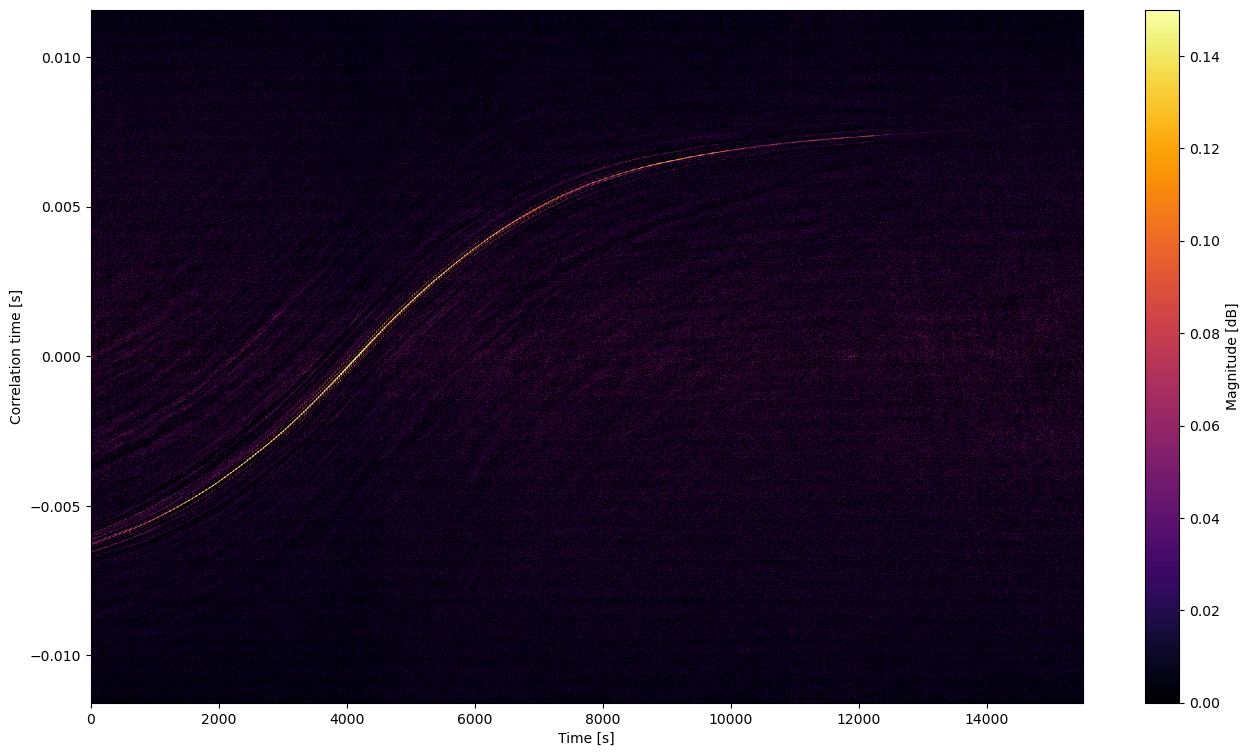

In [1]:
import functions
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/Husøy060425.wav"

fs = 44_100

#sx, fs = functions.load_audiofile(input_file,fs,fc_low=5,mono)

# Load audio data from the input file
data_offcet, fs = librosa.load(input_file, sr=fs,mono=False)  # Load the file, returns the audio signal and its sampling rate

b,a = signal.butter(N=4,Wn=1, btype="highpass",fs=fs)
data_offcet = signal.filtfilt(b,a,data_offcet)   

# Remove DC offset by subtracting the mean value
data = data_offcet - np.mean(data_offcet)  # Remove the mean (DC offset)


ch2 = data[0][(700)*fs:]
ch3 = data[1][(700)*fs:]

graph = []
for i in range(0,int((fs/512)*180)):
    sig1 = ch2[512*i:512*(i+1)]
    sig2 = ch3[512*i:512*(i+1)]

    graph_line, corr_t = functions.scot(sig1, sig2, fs)
    graph.append(graph_line.T)

graph=np.array(graph)
"""
graph = functions.medfilt_vertcal_norm(graph.T,11)
graph = 10*np.log10(np.maximum(graph,1e-10))   # Convert to dB

x_ax = np.linspace(0,len(graph[0]),len(graph[0]))
"""

x_ax = np.linspace(0,len(graph),len(graph))

np.roll(corr_t,1)
# Plot spectrogram
plt.figure(figsize=(16, 9))  # Define figure for results	
plt.subplot(1, 1, 1)

plt.pcolormesh(x_ax, corr_t, graph.T, vmin=0, vmax=0.15, cmap='inferno', shading="gouraud")  # Draw spectrogram image
#plt.imshow(graph)
plt.xlabel("Time [s]")         # Axis labels and scales
plt.ylabel("Correlation time [s]")
        
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale

sx_dem:
[[ 1.56857889e+00 -2.60137496e+00 -1.07535066e+00  1.24900264e+00
  -4.26096845e+00  1.04198794e-01  3.15699871e+00 -2.55725374e+00
  -8.53044507e-01 -1.35933592e+00 -3.18625492e-02 -3.78152515e-01
   7.53405137e-01  3.37511473e-01 -1.28161590e+00  2.12693111e+00
  -1.40591876e+00 -3.86327529e+00  8.23638519e-01 -2.76304556e+00
   8.19036155e-01 -4.62682435e+00]
 [ 3.02864588e-01  4.00156020e-01  1.61681671e-01 -1.67822174e+00
  -1.44045527e-02 -2.68510488e+00  9.17329447e-01 -3.10210806e+00
  -1.73607483e+00 -5.02929762e+00 -3.19136077e+00 -9.94792651e-01
  -6.67675748e-01 -5.26583668e-01 -4.10958776e+00 -9.36035246e-01
   1.11697966e+00 -3.14253220e+00  2.65544958e+00  1.49073006e+00
  -4.80612347e+00 -4.58145689e-01]
 [ 4.16048669e-01  1.25766201e+00  6.08320508e-01 -9.44862788e-01
  -5.91129895e-01  2.30861147e-01 -3.32068251e+00  4.70749606e-01
   9.59688637e-01 -8.53654777e-01  7.96583463e-01 -2.90908479e+00
  -8.78738958e-02 -1.32471216e+00 -4.86973766e-01  2.76947287e+0

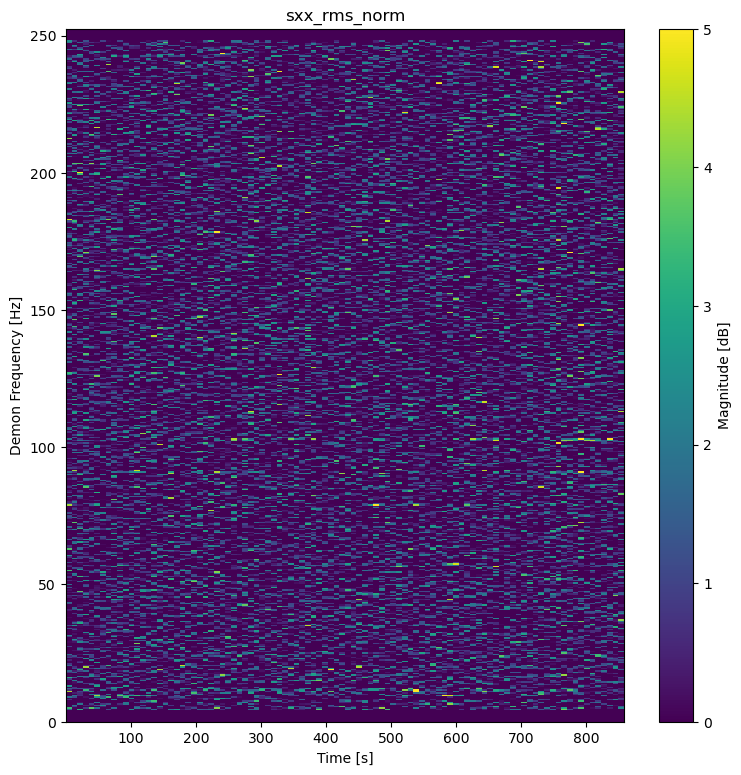

In [4]:
import functions
import numpy as np
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/torrtst2.wav"
fs = 10_000

sx,fs = functions.load_audiofile(input_file,fs,fc_low=5)

fds = 505
tperseg = 2
freq_filt = 7
hfilt_length = 10

td, fd, sx_dem = functions.DEMON_from_data(sx,fs,fds,tperseg,freq_filt,hfilt_length,fmax=fds/2,s_max=5)
t_start = 600
t_start = np.where((td-t_start) >= 0)[0][0]

t_stop = 800
t_stop = np.where((td-t_stop) >= 0)[0][0]

f_start = 100
f_start = np.where((fd-f_start) >= 0)[0][0]

f_stop = 115
f_stop = np.where((fd-f_stop) >= 0)[0][0]
SNR = np.mean(sx_dem[f_start:f_stop ,t_start:t_stop])

print("sx_dem:")
print(sx_dem[f_start:f_stop ,t_start:t_stop])

print(f"t: ({t_start,t_stop}) , f: ({f_start, f_stop}) , SNR = {SNR}")